In [1]:
a = "chr8,7239752,7245771	chr8,7781168,7787181"

In [2]:
x,y = a.split()

In [9]:
_, xs, xe = x.split(",")
_, ys, ye = y.split(",")

In [11]:
int(xs) - int(xe)

-6019

In [14]:
int(ys) - int(xs)

541416

In [3]:
with open("0011_Nerve - Tibial_merged_loop.txt") as f:
    data = f.read()

In [4]:
lines = data.split("\n")

In [5]:
aaa = [
    [
        el
            for comp in line.split("\t")
            for el in comp.split(",")
    ]
    for line in lines[1:]
]

In [1]:
import pandas as pd

In [7]:
df = pd.DataFrame(aaa[:-1])

In [2]:
import numpy as np
np.mean(df[1].apply(int) - df[2].apply(int))

NameError: name 'df' is not defined

In [50]:
np.mean(df[4].apply(int) - df[5].apply(int))

-6616.675576814857

(array([  13.,   43.,  127.,  604., 7078., 5788.,  459.,   67.,   28.,
           9.]),
 array([-1992618. , -1592570.8, -1192523.6,  -792476.4,  -392429.2,
            7618. ,   407665.2,   807712.4,  1207759.6,  1607806.8,
         2007854. ]),
 <BarContainer object of 10 artists>)

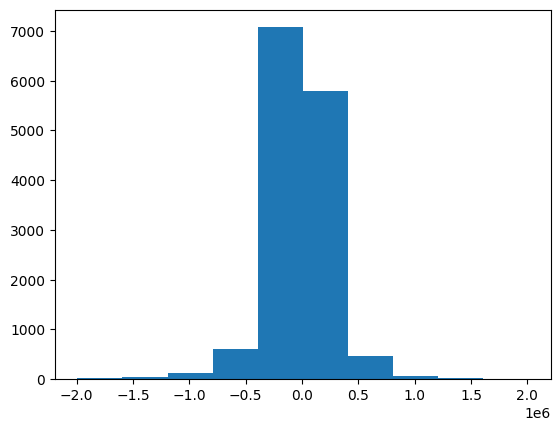

In [57]:
import matplotlib.pyplot as plt

plt.hist(df[1].apply(int) - df[4].apply(int))

(array([1.0741e+04, 2.1430e+03, 7.6300e+02, 2.8500e+02, 1.2500e+02,
        6.8000e+01, 3.7000e+01, 3.2000e+01, 1.4000e+01, 8.0000e+00]),
 array([      0. ,  200785.4,  401570.8,  602356.2,  803141.6, 1003927. ,
        1204712.4, 1405497.8, 1606283.2, 1807068.6, 2007854. ]),
 <BarContainer object of 10 artists>)

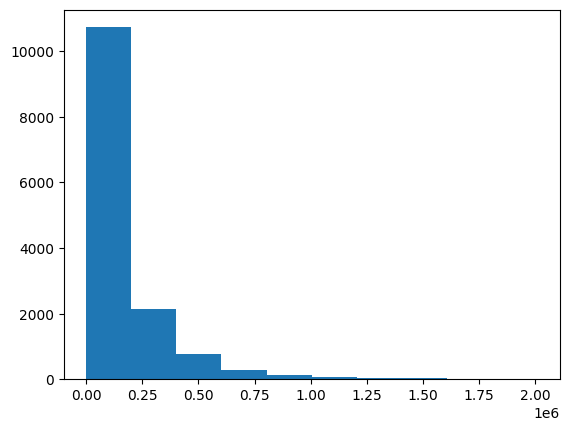

In [65]:
plt.hist(np.abs(df[1].apply(int) - df[4].apply(int)))

In [13]:
import power_law
import matplotlib.pyplot as plt

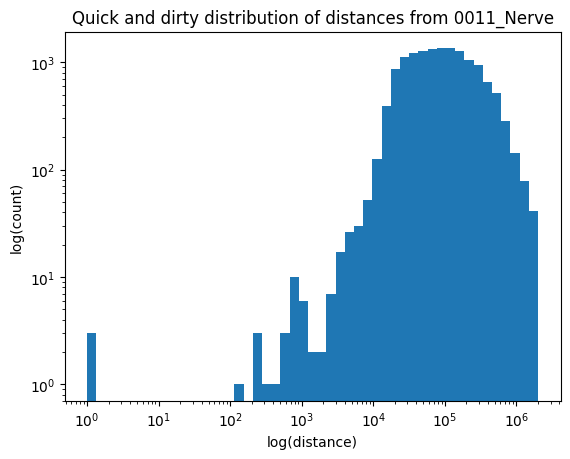

In [17]:

power_law.plot_loglog_hist_binning(1 + np.abs(df[1].apply(int) - df[4].apply(int)))
plt.title("Quick and dirty distribution of distances from 0011_Nerve")
plt.ylabel("log(count)")
plt.xlabel("log(distance)")
plt.show()

In [20]:
np.max(np.abs(df[1].apply(int) - df[4].apply(int)))

2007854

In [1]:
import os

In [78]:
DATA_DIR = "pchic"
filenames = [os.path.join(DATA_DIR, el) for el in os.listdir(DATA_DIR)]

In [3]:
filenames[0]

'pchic/0004_Small Intestine - Terminal Ileum_merged_loop.txt'

In [5]:
import pandas as pd

In [6]:
df  = pd.read_table(filenames[0])
df

bait_frag                other_frag  N_reads  score  \
0      chr1,248601766,248607843  chr1,248810816,248816904      159    inf   
1        chr7,76132574,76144865    chr7,76628054,76637837      123    inf   
2       chr12,10565643,10568289   chr12,10573324,10580972      299    inf   
3          chr8,7239752,7245771      chr8,7781168,7787181      109    inf   
4       chr11,48386729,48389031   chr11,50039109,50042830       91    inf   
...                         ...                       ...      ...    ...   
12838   chr17,27948741,27950690   chr17,27985989,27990700        9    2.0   
12839  chr1,154169444,154171923  chr1,154203343,154208787       12    2.0   
12840  chr8,107284434,107285415  chr8,107512405,107515769        5    2.0   
12841   chr12,51160068,51160874   chr12,51442825,51445751        6    2.0   
12842  chr1,149919379,149926328  chr1,149934550,149944942        8    2.0   

                           bait_gene bait_gene_strand  \
0                              OR2T7                +   
1                         UPK3B,DTX2                +   
2                KLRC3,RP11-277P12.6                -   
3                            ZNF705G                -   
4                              OR4C5                -   
...                              ...              ...   
12838  RP11-68I3.10,CORO6,ABHD15-AS1              -,+   
12839                       C1orf189                -   
12840                  RP11-395G23.3                +   
12841                           ATF1                +   
12842                         OTUD7B                -   

                                     oe_gene oe_gene_strand  \
0                                     OR2T27              -   
1      UPK3BP1,DTX2P1-UPK3BP1-PMS2P11,DTX2P1              +   
2                        RP11-277P12.6,KLRC2              -   
3                                    ZNF705B              +   
4                                        NaN            NaN   
...                                      ...            ...   
12838                        ABHD15-AS1,SSH2            +,-   
12839                                 UBAP2L              +   
12840                                   OXR1              +   
12841                                 LETMD1              +   
12842                                 OTUD7B              -   

        bait_closest_gene bait_closest_gene_strand oe_closest_gene  \
0                   OR2T7                        +          OR2T27   
1              DTX2,UPK3B                        +         UPK3BP1   
2             KLRC4-KLRK1                        -           KLRC3   
3                 ZNF705G                        -         ZNF705B   
4                   OR4C5                        -        GTF2IP11   
...                   ...                      ...             ...   
12838  RP11-68I3.10,CORO6                        -    RP11-68I3.11   
12839                TPM3                        -          UBAP2L   
12840       RP11-395G23.3                        +            OXR1   
12841                ATF1                        +          LETMD1   
12842              MTMR11                        -          OTUD7B   

      oe_closest_gene_strand  
0                          -  
1                          +  
2                          -  
3                          +  
4                          -  
...                      ...  
12838                      -  
12839                      +  
12840                      +  
12841                      +  
12842                      -  

[12843 rows x 12 columns]

In [7]:
df[["bait_frag_chr", "bait_frag_start", "bait_frag_end"]] = df["bait_frag"].str.split(",", expand=True)
df[["other_frag_chr", "other_frag_start", "other_frag_end"]] = df["other_frag"].str.split(",", expand=True)

In [8]:
import numpy as np
df["bait_size"] = np.abs(df["bait_frag_start"].apply(int) - df["bait_frag_end"].apply(int))
df["other_size"] = np.abs(df["other_frag_start"].apply(int) - df["other_frag_end"].apply(int))

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
df = df[(df["bait_size"] < 40_000) & (df["other_size"] < 40_000)]

<Axes: xlabel='bait_size', ylabel='other_size'>

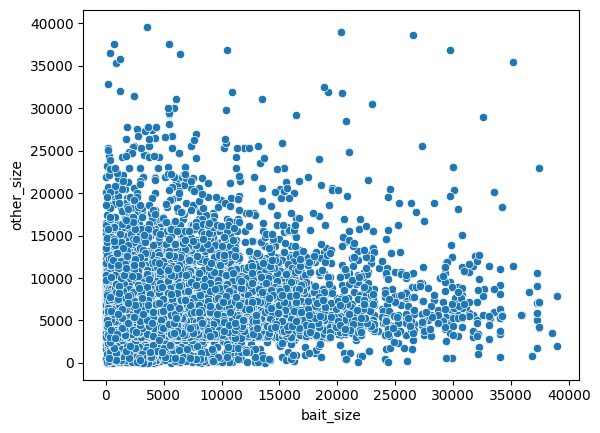

In [12]:
sns.scatterplot(df, x="bait_size", y="other_size")

<Axes: xlabel='bait_size', ylabel='Count'>

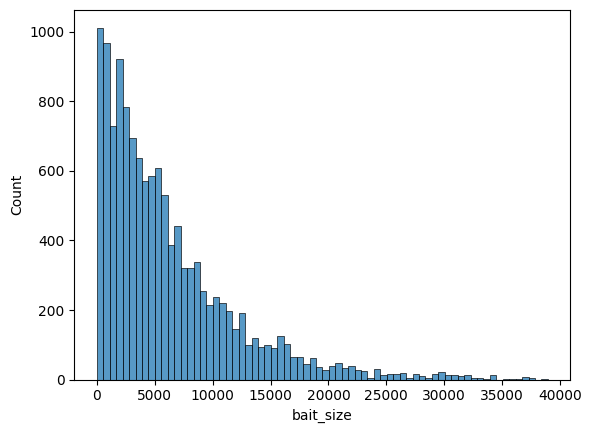

In [13]:
sns.histplot(df, x="bait_size")

<Axes: xlabel='other_size', ylabel='Count'>

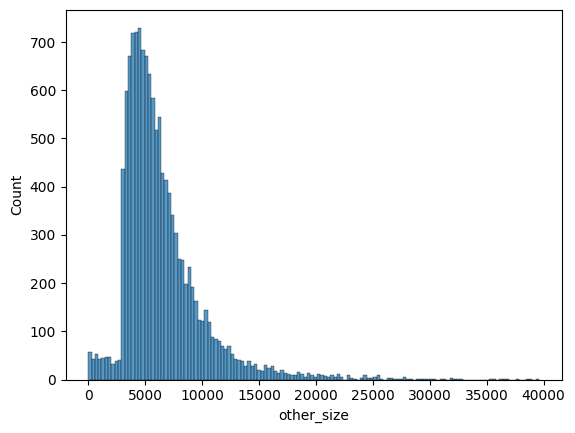

In [53]:
sns.histplot(df, x="other_size")

<Axes: ylabel='Count'>

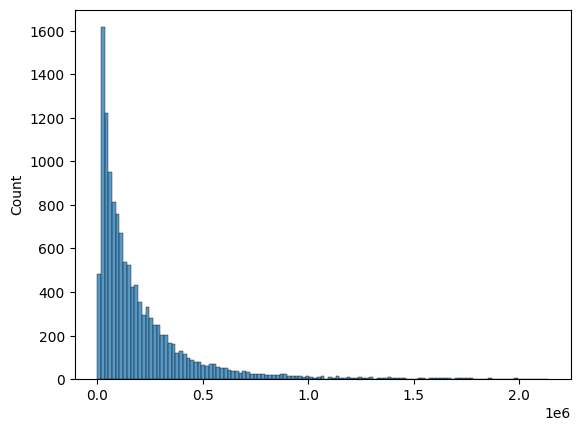

In [65]:
sns.histplot(np.abs(df["bait_frag_start"].apply(int) - df["other_frag_start"].apply(int)))

In [60]:
def plot_loglog_hist_binning(obs, ax=None, num_bins=None):
    if ax is None:
        ax = plt.gca()
    if num_bins is None:
        num_bins = int(np.sqrt(len(obs)))+1
    ax.hist(obs, bins=np.logspace(np.log10(np.min(obs)), np.log10(np.max(obs)), num_bins))
    ax.set_title("Log/log histogram w/ log binning")
    ax.set_yscale("log")
    ax.set_xscale("log")

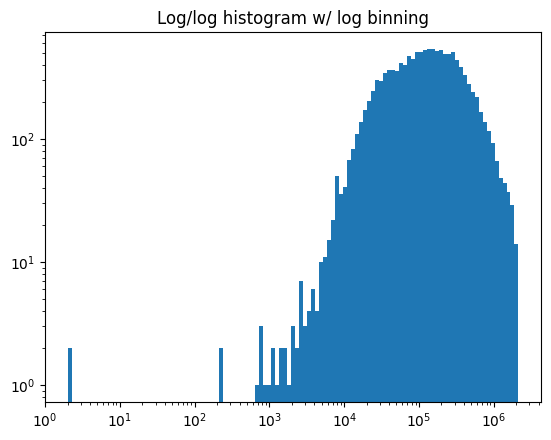

In [63]:
plot_loglog_hist_binning(np.abs(df["bait_frag_start"].apply(int) - df["other_frag_end"].apply(int))+1)

In [16]:
standard_size = 20_000
df["bait_frag_midpoint"] = df.apply(lambda x: int((int(x["bait_frag_start"]) + int(x["bait_frag_end"])) / 2), axis=1)
df["bait_frag_standard_size_start"] = df["bait_frag_midpoint"] - standard_size
df["bait_frag_standard_size_end"]   = df["bait_frag_midpoint"] + standard_size

/tmp/ipykernel_73/4006977697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bait_frag_midpoint"] = df.apply(lambda x: int((int(x["bait_frag_start"]) + int(x["bait_frag_end"])) / 2), axis=1)
/tmp/ipykernel_73/4006977697.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["bait_frag_standard_size_start"] = df["bait_frag_midpoint"] - standard_size
/tmp/ipykernel_73/4006977697.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer

In [17]:
df

bait_frag                other_frag  N_reads  score  \
0      chr1,248601766,248607843  chr1,248810816,248816904      159    inf   
1        chr7,76132574,76144865    chr7,76628054,76637837      123    inf   
2       chr12,10565643,10568289   chr12,10573324,10580972      299    inf   
3          chr8,7239752,7245771      chr8,7781168,7787181      109    inf   
4       chr11,48386729,48389031   chr11,50039109,50042830       91    inf   
...                         ...                       ...      ...    ...   
12838   chr17,27948741,27950690   chr17,27985989,27990700        9    2.0   
12839  chr1,154169444,154171923  chr1,154203343,154208787       12    2.0   
12840  chr8,107284434,107285415  chr8,107512405,107515769        5    2.0   
12841   chr12,51160068,51160874   chr12,51442825,51445751        6    2.0   
12842  chr1,149919379,149926328  chr1,149934550,149944942        8    2.0   

                           bait_gene bait_gene_strand  \
0                              OR2T7                +   
1                         UPK3B,DTX2                +   
2                KLRC3,RP11-277P12.6                -   
3                            ZNF705G                -   
4                              OR4C5                -   
...                              ...              ...   
12838  RP11-68I3.10,CORO6,ABHD15-AS1              -,+   
12839                       C1orf189                -   
12840                  RP11-395G23.3                +   
12841                           ATF1                +   
12842                         OTUD7B                -   

                                     oe_gene oe_gene_strand  \
0                                     OR2T27              -   
1      UPK3BP1,DTX2P1-UPK3BP1-PMS2P11,DTX2P1              +   
2                        RP11-277P12.6,KLRC2              -   
3                                    ZNF705B              +   
4                                        NaN            NaN   
...                                      ...            ...   
12838                        ABHD15-AS1,SSH2            +,-   
12839                                 UBAP2L              +   
12840                                   OXR1              +   
12841                                 LETMD1              +   
12842                                 OTUD7B              -   

        bait_closest_gene bait_closest_gene_strand  ... bait_frag_start  \
0                   OR2T7                        +  ...       248601766   
1              DTX2,UPK3B                        +  ...        76132574   
2             KLRC4-KLRK1                        -  ...        10565643   
3                 ZNF705G                        -  ...         7239752   
4                   OR4C5                        -  ...        48386729   
...                   ...                      ...  ...             ...   
12838  RP11-68I3.10,CORO6                        -  ...        27948741   
12839                TPM3                        -  ...       154169444   
12840       RP11-395G23.3                        +  ...       107284434   
12841                ATF1                        +  ...        51160068   
12842              MTMR11                        -  ...       149919379   

      bait_frag_end other_frag_chr other_frag_start other_frag_end bait_size  \
0         248607843           chr1        248810816      248816904      6077   
1          76144865           chr7         76628054       76637837     12291   
2          10568289          chr12         10573324       10580972      2646   
3           7245771           chr8          7781168        7787181      6019   
4          48389031          chr11         50039109       50042830      2302   
...             ...            ...              ...            ...       ...   
12838      27950690          chr17         27985989       27990700      1949   
12839     154171923           chr1        154203343      154208787      2479   
12840     107285415           chr8

In [10]:
import genomepy

In [12]:
genomepy.install_genome("hg38")

Fasta("/home/kacper/.local/share/genomes/hg38/hg38.fa")

In [13]:
hg = genomepy.Genome("hg38")

In [22]:
%%time
for i, row in df.iterrows():
    hg.get_seq(row["bait_frag_chr"], row["bait_frag_standard_size_start"], row["bait_frag_standard_size_end"])
    print(f"{i:>10}", end="\r")

CPU times: user 3.76 s, sys: 462 ms, total: 4.22 s
Wall time: 6.97 s


In [113]:
hg.get_seq(row["bait_frag_chr"], row["bait_frag_standard_size_start"], row["bait_frag_standard_size_end"])

0

In [24]:
import torch


In [25]:
from torch.nn import functional as F

In [71]:
def fasta_to_ohe_mapping(ascii_dna):
        if ascii_dna == 65:  # A
            return 1
        if ascii_dna == 67:  # C
            return 2
        if ascii_dna == 71:  # G
            return 3
        if ascii_dna == 84:  # T
            return 4
        if ascii_dna == 97:  # a
            return 1
        if ascii_dna == 99:  # c
            return 2
        if ascii_dna == 103: # g
            return 3
        if ascii_dna == 116: # t
            return 4
        return 0 # Nn, anything else

def from_loc_to_ohe(chr, start, end):
    sequence = hg.get_seq(chr, start, end)
    buffer = torch.frombuffer(sequence.seq.encode(), dtype=torch.uint8)
    buffer = buffer.apply_(fasta_to_ohe_mapping)
    atcg_mask = buffer != 0 # 1 if actg, 0 otherwise
    buffer -= atcg_mask * 1 # offset indexing for atcg so it starts at 0 instead of 1
                            # this is needed to have the "others" be a 0000 row in OHE
    return (
        F.one_hot(buffer.long(), num_classes=4).T * atcg_mask # OHE and mask others
    )

In [72]:
%%timeit
from_loc_to_ohe(row["bait_frag_chr"], row["bait_frag_standard_size_start"], row["bait_frag_standard_size_end"])

7.2 ms ± 474 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [73]:
%%time
for i, row in df.iterrows():
    from_loc_to_ohe(row["bait_frag_chr"], row["bait_frag_standard_size_start"], row["bait_frag_standard_size_end"])
    print(f"{i:>10}", end="\r")

ValueError: both buffer length (0) and count (-1) must not be 0

In [76]:
df.iloc[136, :]

bait_frag                        chr12,133618841,133620649
other_frag                       chr12,133634189,133637522
N_reads                                                 24
score                                                 9.84
bait_gene                                            ZNF84
bait_gene_strand                                         +
oe_gene                                              ZNF84
oe_gene_strand                                           +
bait_closest_gene                                    ZNF84
bait_closest_gene_strand                                 +
oe_closest_gene                                      ZNF84
oe_closest_gene_strand                                   +
bait_frag_chr                                        chr12
bait_frag_start                                  133618841
bait_frag_end                                    133620649
other_frag_chr                                       chr12
other_frag_start                                 1336341

In [77]:
hg.get_seq("chr12", 133619745, 133599745)

>chr12:133619745-133619744

# aaa

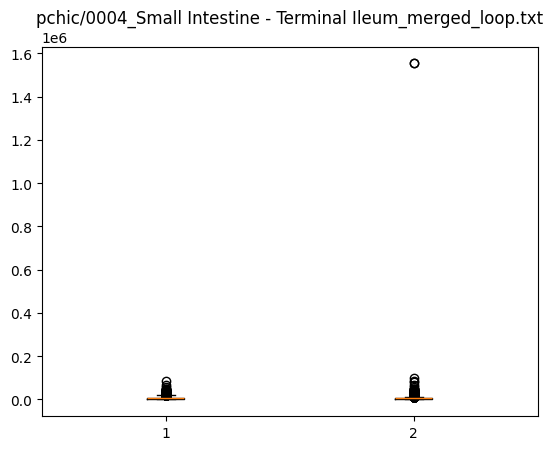

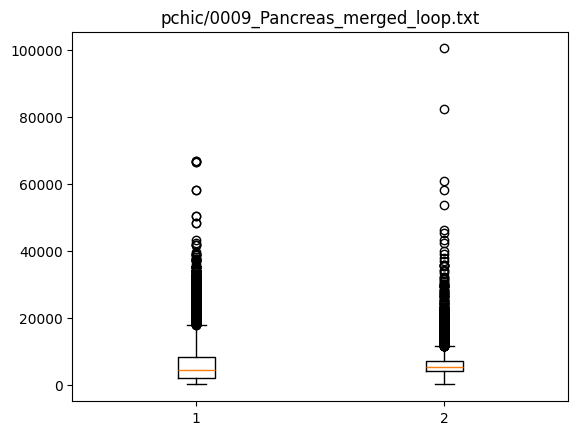

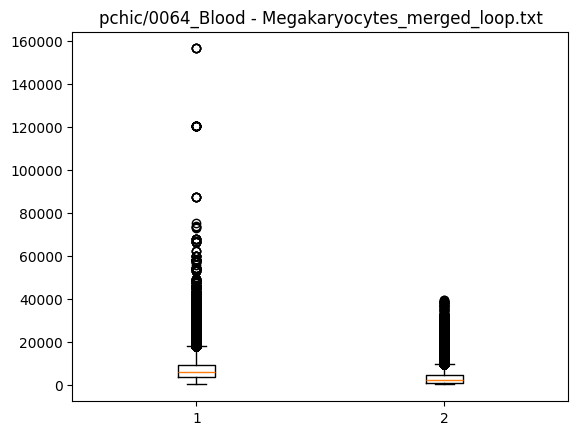

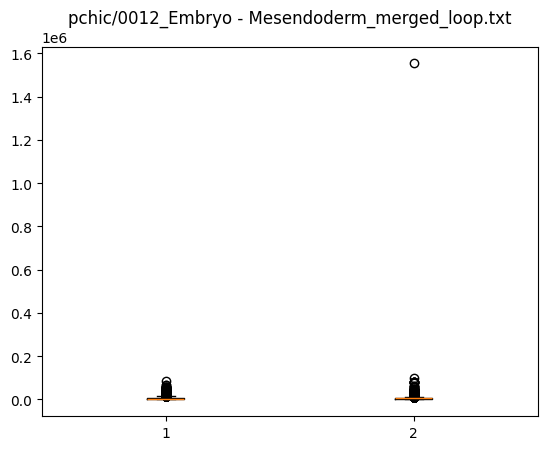

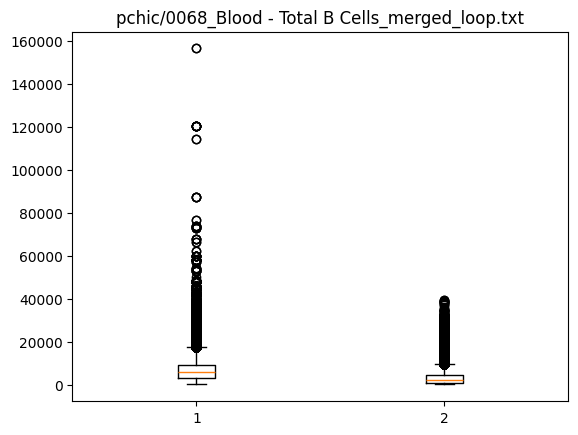

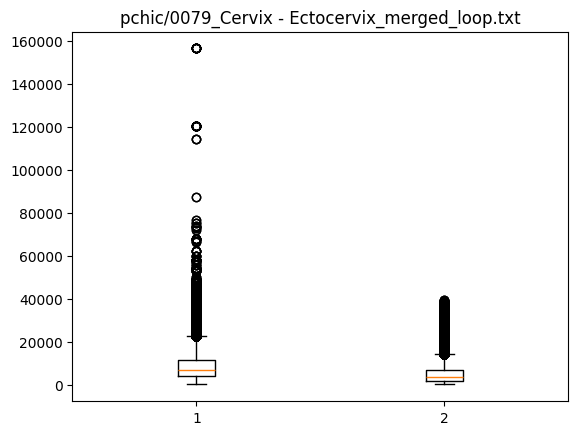

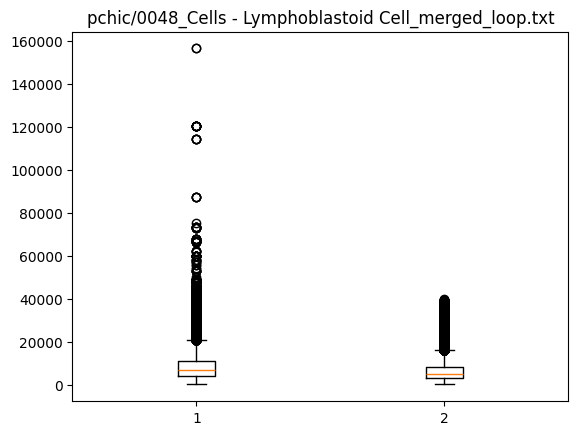

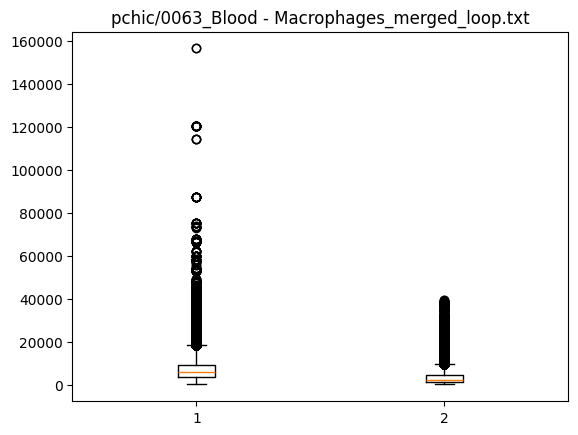

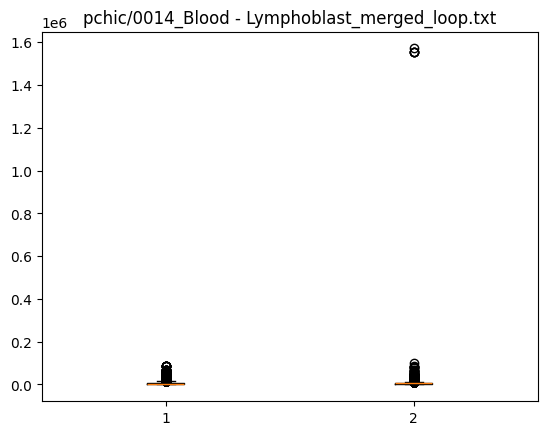

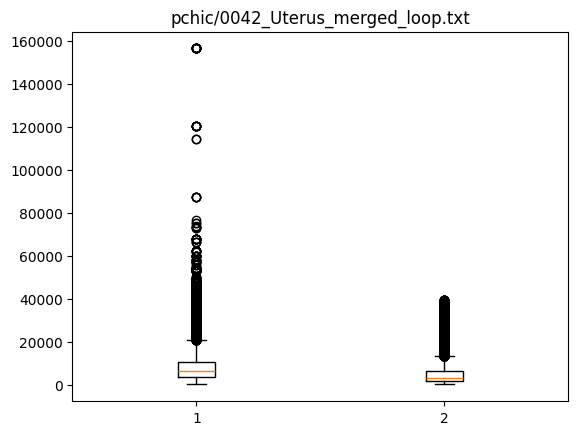

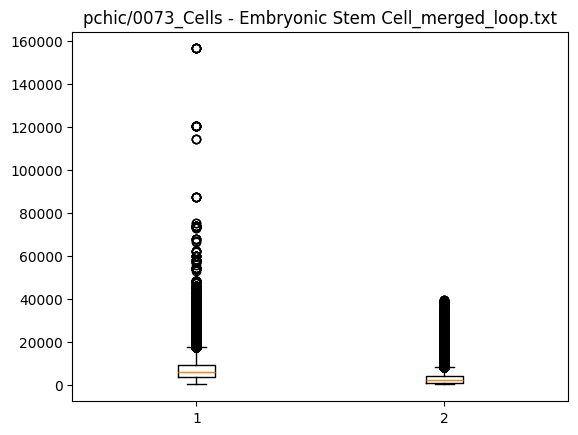

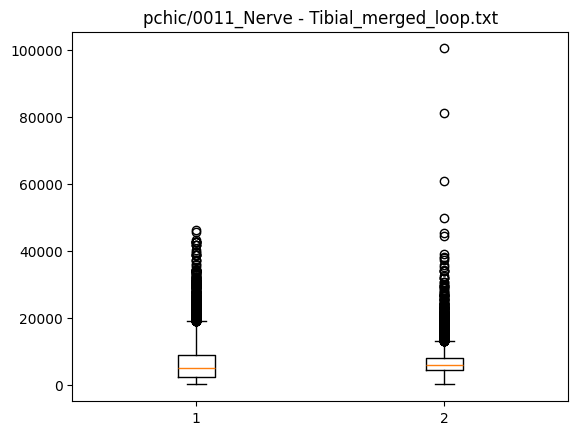

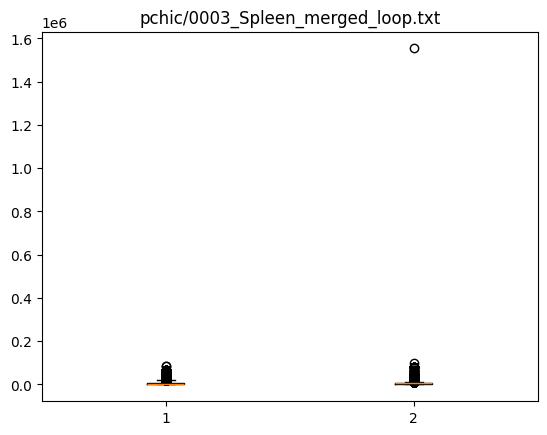

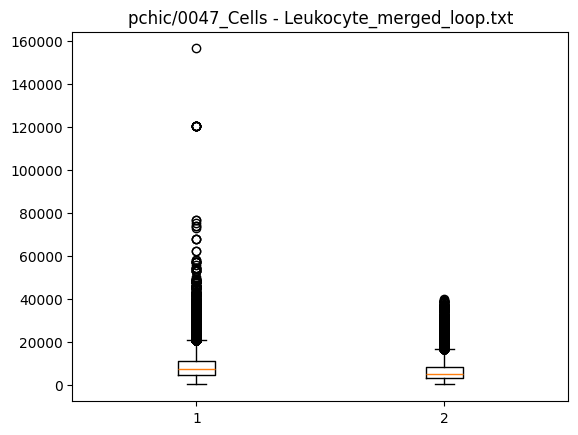

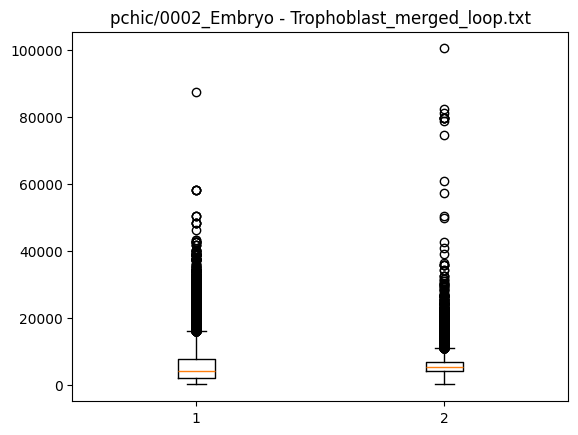

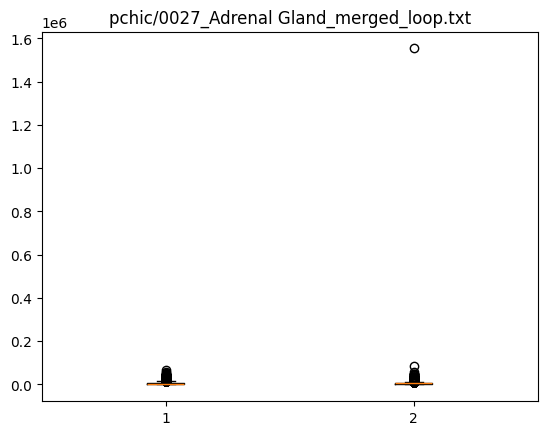

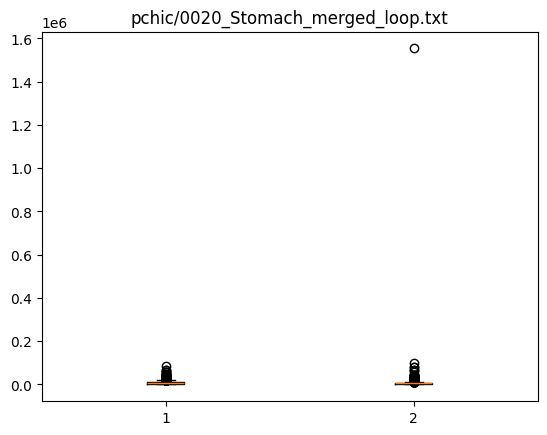

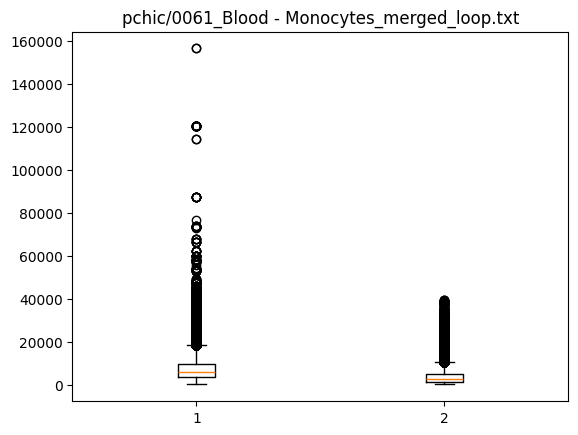

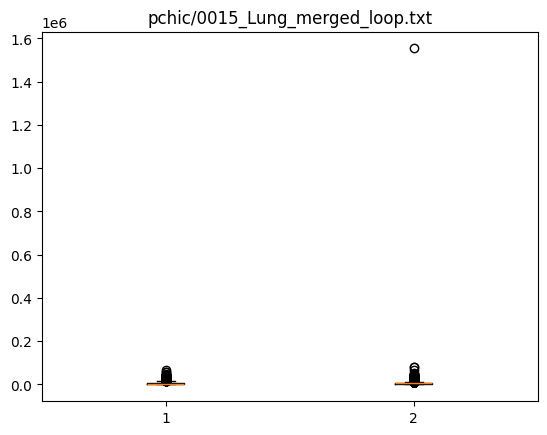

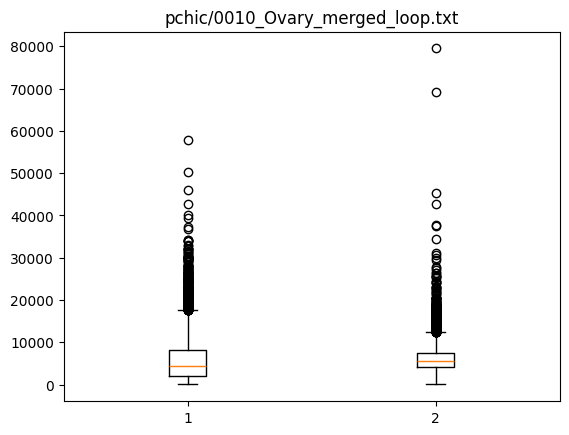

KeyboardInterrupt: 

In [51]:
df_list = []
for filename in filenames:
    df_i  = pd.read_table(filename)
    df_i[["bait_frag_chr", "bait_frag_start", "bait_frag_end"]] = df_i["bait_frag"].str.split(",", expand=True)
    df_i[["other_frag_chr", "other_frag_start", "other_frag_end"]] = df_i["other_frag"].str.split(",", expand=True)
    import numpy as np
    df_i["bait_size"] = np.abs(df_i["bait_frag_start"].apply(int) - df_i["bait_frag_end"].apply(int))
    df_i["other_size"] = np.abs(df_i["other_frag_start"].apply(int) - df_i["other_frag_end"].apply(int))
    plt.boxplot(df_i[["bait_size", "other_size"]])
    plt.title(filename)
    plt.show()
    print(filename, end="\r")
    df_list.append([filename, np.mean(df_i["bait_size"]), np.mean(df_i["other_size"]), np.std(df_i["bait_size"]), np.std(df_i["other_size"])])

In [52]:
df_list = []
for filename in filenames:
    df_i  = pd.read_table(filename)
    df_i[["bait_frag_chr", "bait_frag_start", "bait_frag_end"]] = df_i["bait_frag"].str.split(",", expand=True)
    df_i[["other_frag_chr", "other_frag_start", "other_frag_end"]] = df_i["other_frag"].str.split(",", expand=True)
    import numpy as np
    df_i["bait_size"] = np.abs(df_i["bait_frag_start"].apply(int) - df_i["bait_frag_end"].apply(int))
    df_i["other_size"] = np.abs(df_i["other_frag_start"].apply(int) - df_i["other_frag_end"].apply(int))
    df_i = df_i[(df_i["bait_size"] < 20_000) & (df_i["other_size"] < 20_000)]
    print(filename, end="\r")
    df_list.append([filename, np.mean(df_i["bait_size"]), np.mean(df_i["other_size"]), np.std(df_i["bait_size"]), np.std(df_i["other_size"])])

<ErrorbarContainer object of 3 artists>

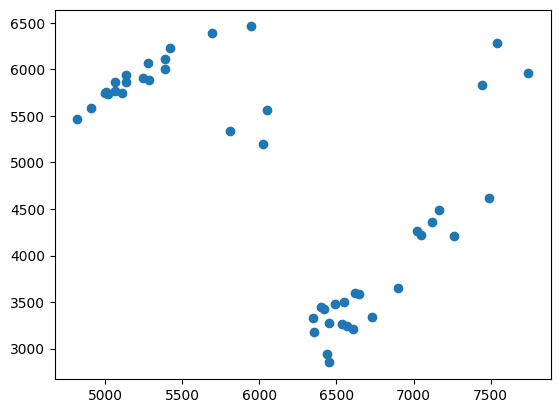

In [54]:
df_tissue = pd.DataFrame(df_list)
df_tissue = df_tissue.rename({0: "filename", 1: "bait_mean", 2: "other_mean", 3: "bait_std", 4: "other_std"}, axis=1)
plt.errorbar(
    x=df_tissue["bait_mean"],
    y=df_tissue["other_mean"],
    # xerr=df_tissue["bait_std"],
    # yerr=df_tissue["other_std"],
    fmt="o"
)

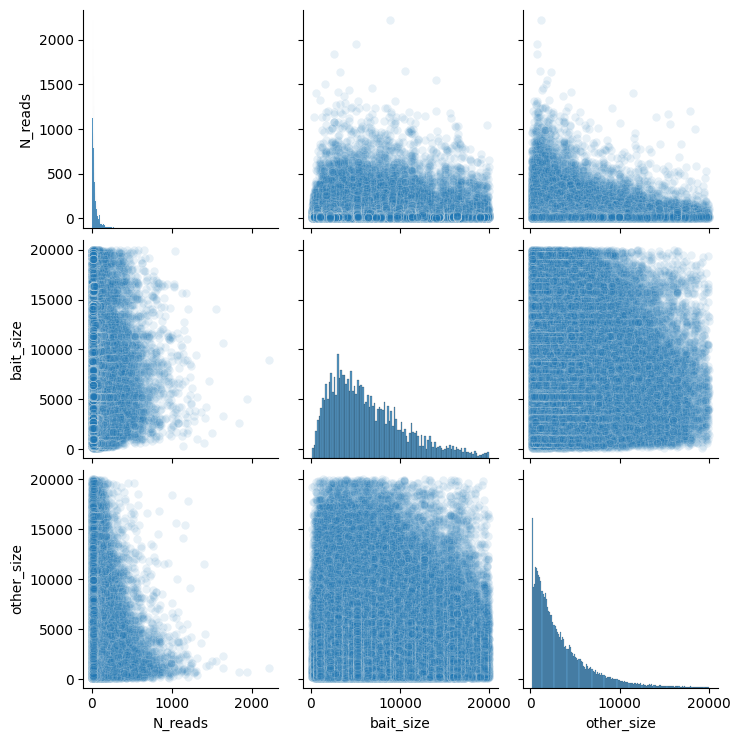

In [74]:
import seaborn as sns
sns.pairplot(
    df_i[["N_reads", "bait_size", "other_size", "bait_frag_chr"]],
    plot_kws = {"alpha": 0.1}
    # df_i[df_i["N_reads"] > 100]["bait_size"],
    # df_i[df_i["N_reads"] > 100]["other_size"]
)

(array([2.05007e+05, 3.36200e+03, 7.33000e+02, 2.49000e+02, 8.90000e+01,
        3.90000e+01, 7.00000e+00, 2.00000e+00, 2.00000e+00, 1.00000e+00]),
 array([   3. ,  224.9,  446.8,  668.7,  890.6, 1112.5, 1334.4, 1556.3,
        1778.2, 2000.1, 2222. ]),
 <BarContainer object of 10 artists>)

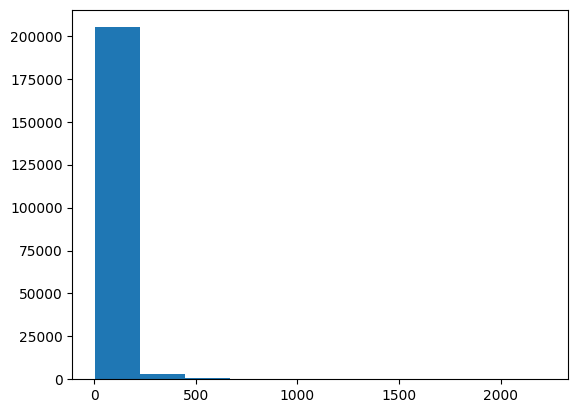

In [92]:
plt.hist(df_i["N_reads"])

bait_frag            other_frag  N_reads  score  \
28  chr1,1206874,1212438  chr1,1034269,1040208       35   5.27   
29  chr1,1206874,1212438  chr1,1040209,1043143       50   8.26   
30  chr1,1206874,1212438  chr1,1043144,1048247       34   5.30   
31  chr1,1206874,1212438  chr1,1048248,1049051      100  18.75   
52  chr1,1309969,1313315  chr1,1048248,1049051       40  14.59   

           bait_gene bait_gene_strand   oe_gene oe_gene_strand  \
28  UBE2J2,LINC01786              -,+  C1orf159              -   
29  UBE2J2,LINC01786              -,+  C1orf159              -   
30  UBE2J2,LINC01786              -,+  C1orf159              -   
31  UBE2J2,LINC01786              -,+  C1orf159              -   
52          AURKAIP1                -  C1orf159              -   

   bait_closest_gene bait_closest_gene_strand oe_closest_gene  \
28  UBE2J2,LINC01786                      -,+        C1orf159   
29  UBE2J2,LINC01786                      -,+        C1orf159   
30  UBE2J2,LINC01786                      -,+        C1orf159   
31  UBE2J2,LINC01786                      -,+        C1orf159   
52          AURKAIP1                        -        C1orf159   

   oe_closest_gene_strand bait_frag_chr bait_frag_start bait_frag_end  \
28                      -          chr1         1206874       1212438   
29                      -          chr1         1206874       1212438   
30                      -          chr1         1206874       1212438   
31                      -          chr1         1206874       1212438   
52                      -          chr1         1309969       1313315   

   other_frag_chr other_frag_start other_frag_end  bait_size  other_size  
28           chr1          1034269        1040208       5564        5939  
29           chr1          1040209        1043143       5564        2934  
30           chr1          1043144        1048247       5564        5103  
31           chr1          1048248        1049051       5564         803  
52           chr1          1048248        1049051       3346         803

In [80]:
filename

'pchic/0071_Blood - Non-activated CD4+ Cells_merged_loop.txt'

In [84]:
len(df_i.bait_frag.unique())

12663

In [86]:
len(df_i.other_frag.unique())

96021

(array([1.1485e+04, 8.6200e+02, 2.1000e+02, 5.9000e+01, 3.2000e+01,
        5.0000e+00, 5.0000e+00, 1.0000e+00, 2.0000e+00, 2.0000e+00]),
 array([  1. ,  43.6,  86.2, 128.8, 171.4, 214. , 256.6, 299.2, 341.8,
        384.4, 427. ]),
 <BarContainer object of 10 artists>)

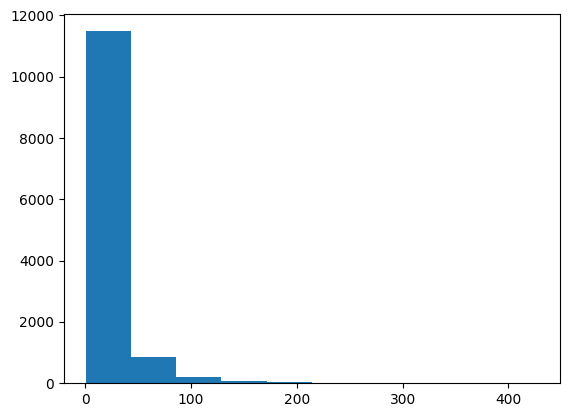

In [93]:
plt.hist(df_i.groupby("bait_frag").count().other_frag)

In [122]:
rnaseq = pd.read_table("rnaseq.rsem_genes_fpkm.txt")

In [136]:
np.unique([el[:4] for el in list(rnaseq.columns)[2:] ])

array(['0001', '0002', '0003', '0004', '0005', '0006', '0007', '0008',
       '0010', '0011', '0012', '0013', '0015', '0016', '0017', '0020',
       '0022', '0023', '0026', '0027', '0028', '0029', '0030', '0031',
       '0032', '0033', '0034', '0035', '0036', '0037', '0039', '0040',
       '0041', '0042', '0045', '0046', '0051', '0052', '0056', '0060',
       '0061', '0064', '0067'], dtype='<U4')

In [111]:
df_i[(df_i["oe_gene"].str.contains("C1orf159").fillna(False)) | (df_i["bait_gene"].str.contains("C1orf159").fillna(False))]

bait_frag            other_frag  N_reads  score  \
9   chr1,1049052,1062659  chr1,1107116,1109732       16   5.63   
10  chr1,1049052,1062659  chr1,1109733,1122642       17   7.08   
11  chr1,1049052,1062659  chr1,1206874,1212438       45  36.70   
14  chr1,1049052,1062659  chr1,1309969,1313315       14  15.42   
15  chr1,1049052,1062659  chr1,1364314,1373173        5   6.05   
28  chr1,1206874,1212438  chr1,1034269,1040208       35   5.27   
29  chr1,1206874,1212438  chr1,1040209,1043143       50   8.26   
30  chr1,1206874,1212438  chr1,1043144,1048247       34   5.30   
31  chr1,1206874,1212438  chr1,1048248,1049051      100  18.75   
52  chr1,1309969,1313315  chr1,1048248,1049051       40  14.59   

           bait_gene bait_gene_strand            oe_gene oe_gene_strand  \
9           C1orf159                -  TTLL10,TTLL10-AS1            +,-   
10          C1orf159                -  TTLL10,TTLL10-AS1            +,-   
11          C1orf159                -   UBE2J2,LINC01786            -,+   
14          C1orf159                -           AURKAIP1              -   
15          C1orf159                -     LINC01770,VWA1            -,+   
28  UBE2J2,LINC01786              -,+           C1orf159              -   
29  UBE2J2,LINC01786              -,+           C1orf159              -   
30  UBE2J2,LINC01786              -,+           C1orf159              -   
31  UBE2J2,LINC01786              -,+           C1orf159              -   
52          AURKAIP1                -           C1orf159              -   

   bait_closest_gene bait_closest_gene_strand    oe_closest_gene  \
9           C1orf159                        -             TTLL10   
10          C1orf159                        -  TTLL10-AS1,TTLL10   
11          C1orf159                        -   UBE2J2,LINC01786   
14          C1orf159                        -           AURKAIP1   
15          C1orf159                        -     LINC01770,VWA1   
28  UBE2J2,LINC01786                      -,+           C1orf159   
29  UBE2J2,LINC01786                      -,+           C1orf159   
30  UBE2J2,LINC01786                      -,+           C1orf159   
31  UBE2J2,LINC01786                      -,+           C1orf159   
52          AURKAIP1                        -           C1orf159   

   oe_closest_gene_strand bait_frag_chr bait_frag_start bait_frag_end  \
9                       +          chr1         1049052       1062659   
10                    -,+          chr1         1049052       1062659   
11                    -,+          chr1         1049052       1062659   
14                      -          chr1         1049052       1062659   
15                    -,+          chr1         1049052       1062659   
28                      -          chr1         1206874       1212438   
29                      -          chr1         1206874       1212438   
30                      -          chr1         1206874       1212438   
31                      -          chr1         1206874       1212438   
52                      -          chr1         1309969       1313315   

   other_frag_chr other_frag_start other_frag_end  bait_size  other_size  
9            chr1          1107116        1109732      13607        2616  
10           chr1          1109733        1122642      13607       12909  
11           chr1          1206874        1212438      13607        5564  
14           chr1          1309969        1313315      13607        3346  
15           chr1          1364314        1373173      13607        8859  
28           chr1          1034269        1040208       5564        5939  
29           chr1          1040209        1043143       5564        2934  
30           chr1          1043144        1048247       5564        5103  
31           chr1          1048248        1049051       5564         803  
52           chr1          1048248        1049051       3346         803

In [113]:
rnaseq[rnaseq["gene_name"] == "C1orf159"]

gene_id gene_name  0001_GSE86189_Thymus_0  0001_GSE86189_Thymus_1  \
68  ENSG00000131591  C1orf159                   868.0                   814.0   

    0001_GSE86189_Thymus_2  0001_GSE86189_Thymus_3  0001_GSE86189_Thymus_4  \
68                   456.0                   870.0                   917.0   

    0002_GSE86189_Embryo - Trophoblast_0  0003_GSE86189_Spleen_0  \
68                                2061.0                   514.0   

    0003_GSE86189_Spleen_1  ...  \
68                   517.0  ...   

    0064_EGAD00001002268_Blood - Megakaryocytes_1  \
68                                            5.0   

    0064_EGAD00001002268_Blood - Megakaryocytes_2  \
68                                          511.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_0  \
68                                            449.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_1  \
68                                            421.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_2  \
68                                            460.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_3  \
68                                            199.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_4  \
68                                            325.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_5  \
68                                            202.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_6  \
68                                            411.0   

    0067_EGAD00001002268_Blood - Total CD4+ Cells_7  
68                                            282.0  

[1 rows x 196 columns]

In [139]:
sorted([el[6:10] for el in filenames])

['0002',
 '0003',
 '0004',
 '0008',
 '0009',
 '0010',
 '0011',
 '0012',
 '0013',
 '0014',
 '0015',
 '0017',
 '0020',
 '0021',
 '0024',
 '0025',
 '0026',
 '0027',
 '0028',
 '0029',
 '0032',
 '0042',
 '0044',
 '0045',
 '0047',
 '0048',
 '0055',
 '0056',
 '0057',
 '0058',
 '0060',
 '0061',
 '0063',
 '0064',
 '0065',
 '0066',
 '0067',
 '0068',
 '0069',
 '0070',
 '0071',
 '0072',
 '0073',
 '0074',
 '0077',
 '0079']

# Joining RNAseq

In [2]:
import pandas as pd

In [3]:
fpkm = pd.read_table("rnaseq/rnaseq.rsem_genes_fpkm.txt")

In [4]:
expected_count = pd.read_table("rnaseq/rnaseq.rsem_genes_expected_count.txt")

In [5]:
tpm = pd.read_table("rnaseq/rnaseq.rsem_genes_tpm.txt")

In [6]:
wide = pd.concat((
    expected_count,
    fpkm,
    tpm
))

In [7]:
melted = wide.melt(["gene_id", "gene_name"])

In [8]:
melted = melted.rename({"variable": "tissue"}, axis=1)

In [9]:
melted["tissue_id"] = melted["tissue"].apply(lambda x: x[:4])

In [13]:
aggregated_long = melted[["tissue_id", "gene_name", "value"]].groupby(["tissue_id", "gene_name"]).mean()

In [26]:
agg_wide = aggregated_long.reset_index().pivot(index="tissue_id", columns=["gene_name"])

In [55]:
sum(agg_wide.std() >  0.0)

49908

In [56]:
agg_wide.to_csv("rnaseq/aggregated_wide.csv")

In [57]:
agg_wide

value                                                   \
gene_name   5S_rRNA       7SK          A1BG    A1BG-AS1         A1CF   
tissue_id                                                              
0001       0.000000  0.000000    154.514667  110.150000     0.144667   
0002       0.000000  0.000000    111.070000  101.160000     0.666667   
0003       0.000000  0.093056     37.879167   26.591667     0.252500   
0004       0.000000  0.000000      0.133056    0.065556    33.081389   
0005       0.000000  0.000000      0.954167    0.449722     6.935278   
0006       0.000000  0.000000      4.249048    2.434762     0.303810   
0007       0.000000  0.000000     22.878750    7.036250     0.042500   
0008       0.000000  0.000000      8.155000    1.438333     0.086667   
0010       0.000000  0.000000     20.120833    7.830833     0.000000   
0011       0.000000  2.145556    109.226667   97.216667    17.390000   
0012       0.000000  0.000000    191.000000  103.563333     1.666667   
0013       0.000000  0.000000   1291.920000  517.316667     0.000000   
0015       0.000000  0.087222     54.988333   22.107500     0.269167   
0016       0.000000  0.000000  28897.783333   73.710000  2801.685000   
0017       0.000000  0.000000      3.791667    2.630000     0.000000   
0020       0.000000  0.000000     11.673333    3.363333     2.547500   
0022       0.000000  0.000000     38.072222    4.727500    24.543611   
0023       0.000000  0.183810      5.932381    5.597143     0.000000   
0026       0.000000  0.000000      3.687500    0.675417     9.787500   
0027       0.361111  1.216667      3.730000    5.616667    44.120000   
0028       0.000000  0.000000    112.841667  128.568333     1.231667   
0029       0.000000  0.000000     10.898333   43.460000     0.171667   
0030       0.054167  0.000000    118.596667   78.556667     0.166667   
0031       0.091111  0.000000     28.500000   71.295000     0.351667   
0032       0.063333  0.000000     46.851667   78.198333     0.336667   
0033       0.000000  0.000000      3.849167    4.626667     0.535833   
0034       0.000000  0.000000      7.749167   10.400833     0.262500   
0035       0.000000  0.147778      6.485000   11.374167     0.203333   
0036       0.000000  0.000000      9.278333    7.675833     0.000000   
0037       0.000000  0.000000      6.230000   11.271667     0.091667   
0039       0.000000  0.252778      9.545000   12.758333     0.351667   
0040       0.000000  0.124444      7.805000    8.113333     0.088333   
0041       1.185000  0.000000     12.530000   11.664167     0.000000   
0042       1.830972  0.000000     11.538333   11.356667     0.000000   
0045       0.000000  0.000000      0.990000    1.553333     0.000000   
0046       0.000000  0.000000     40.920000   66.696667     0.000000   
0051       0.196667  0.374815     17.916667   11.752222     7.015556   
0052       0.000000  0.000000     12.266667    9.141111     3.492222   
0056       0.000000  0.321905     19.060000   21.629524     9.690476   
0060       0.000000  1.072063      1.681905    4.053810     0.000000   
0061       0.000000  0.159556     75.713333   72.177333     0.000000   
0064       0.000000  0.928889     79.754444   84.627778     4.676667   
0067       0.000000  0.315278     39.301667   61.617917     0.125000   

                                                                       ...  \
gene_name            A2M     A2M-AS1        A2ML1 A2ML1-AS1 A2ML1-AS2  ...   
tissue_id                                                              ...   
0001         1622.902000    8.130000  1024.466000  0.000000  0.000000  ...   
0002          167.363333   13.080000   366.320000  0.750000  0.000000  ...   
0003         1076.398333    8.276667     3.991667  0.000000  0.000000  ...   
0004            3.450556    0.000000     0.117222  0.000000  0.000000  ...   
0005           20.491667    0.117778     0.231667  0.000000  0.000000  ...   
0006         2387.758095    7.869524     0.700952  0.000000  0.000000  ...   

In [65]:
ids_present = list(agg_wide.index)

# Joining on id

In [59]:
import os

In [66]:
pchic_files = sorted(os.listdir("pchic"))

In [68]:
len(ids_present)

43

In [67]:
len(pchic_files)

46

In [74]:
len([el for el in pchic_files if el[:4] in ids_present])

23

In [73]:
melted["tissue"].unique()

array(['0001_GSE86189_Thymus_0', '0001_GSE86189_Thymus_1',
       '0001_GSE86189_Thymus_2', '0001_GSE86189_Thymus_3',
       '0001_GSE86189_Thymus_4', '0002_GSE86189_Embryo - Trophoblast_0',
       '0003_GSE86189_Spleen_0', '0003_GSE86189_Spleen_1',
       '0003_GSE86189_Spleen_2', '0003_GSE86189_Spleen_3',
       '0004_GSE86189_Small Intestine - Terminal Ileum_0',
       '0004_GSE86189_Small Intestine - Terminal Ileum_1',
       '0004_GSE86189_Small Intestine - Terminal Ileum_2',
       '0004_GSE86189_Small Intestine - Terminal Ileum_3',
       '0004_GSE86189_Small Intestine - Terminal Ileum_4',
       '0004_GSE86189_Small Intestine - Terminal Ileum_5',
       '0004_GSE86189_Small Intestine - Terminal Ileum_6',
       '0004_GSE86189_Small Intestine - Terminal Ileum_7',
       '0004_GSE86189_Small Intestine - Terminal Ileum_8',
       '0004_GSE86189_Small Intestine - Terminal Ileum_9',
       '0004_GSE86189_Small Intestine - Terminal Ileum_10',
       '0004_GSE86189_Small Intestine - T

# Other tissue negative

In [89]:
df_full_list = []
for filename in filenames:
    df_i = pd.read_table(filename)
    df_i["tissue"] = filename[6:]
    df_full_list.append(df_i)

In [90]:
df_full = pd.concat(df_full_list)

(array([18954.,  3243.,  5038.,  4365.,  5048.,  5161.,  2227.,   776.,
          868.,   580.]),
 array([ 1. ,  5.5, 10. , 14.5, 19. , 23.5, 28. , 32.5, 37. , 41.5, 46. ]),
 <BarContainer object of 10 artists>)

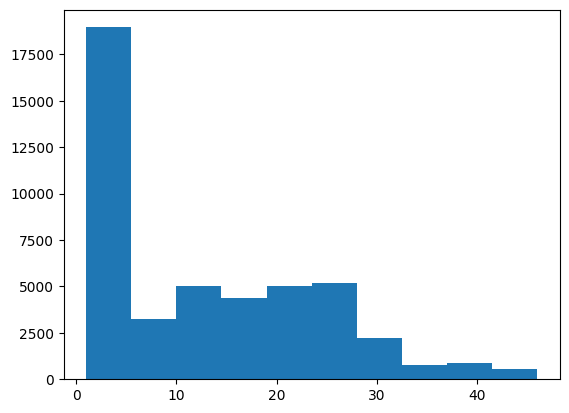

In [106]:
plt.hist(df_full.groupby(["bait_frag"])["tissue"].nunique())

In [102]:
a.sort_values("other_frag", ascending=False).head(5000).tail(50)

other_frag  \
bait_frag                 tissue                                                           
chr15,94773058,94782077   0068_Blood - Total B Cells_merged_loop.txt                  71   
chr2,20549888,20554524    0060_Blood - Neutrophils_merged_loop.txt                    71   
chr1,84941119,84947206    0073_Cells - Embryonic Stem Cell_merged_loop.txt            71   
chr4,105894737,105896239  0061_Blood - Monocytes_merged_loop.txt                      71   
chr1,182354704,182363894  0056_Blood - Erythroblast_merged_loop.txt                   71   
chrX,128868446,128879744  0063_Blood - Macrophages_merged_loop.txt                    71   
chr6,27593274,27599538    0048_Cells - Lymphoblastoid Cell_merged_loop.txt            71   
chr12,62859357,62860657   0066_Blood - Naive CD4+ Cells_merged_loop.txt               71   
chr6,27790966,27792446    0071_Blood - Non-activated CD4+ Cells_merged_lo...          71   
chr4,113429679,113441454  0068_Blood - Total B Cells_merged_loop.txt                  71   
chr1,90096958,90103624    0071_Blood - Non-activated CD4+ Cells_merged_lo...          71   
chr1,120431471,120440812  0044_Cells - Neuroectodermal Cell_merged_loop.txt           71   
chr10,17243060,17248253   0072_Blood - Activated CD4+ Cells_merged_loop.txt           71   
chr5,87166014,87170724    0063_Blood - Macrophages_merged_loop.txt                    71   
chr6,86384683,86387834    0072_Blood - Activated CD4+ Cells_merged_loop.txt           71   
chr2,148777364,148780994  0066_Blood - Naive CD4+ Cells_merged_loop.txt               71   
chr12,102131369,102136591 0069_Blood - Naive B Cells_merged_loop.txt                  71   
chr14,81667655,81671398   0066_Blood - Naive CD4+ Cells_merged_loop.txt               71   
chr8,38242580,38252729    0069_Blood - Naive B Cells_merged_loop.txt                  71   
chr7,86779551,86783064    0071_Blood - Non-activated CD4+ Cells_merged_lo...          71   
chr6,27829816,27834320    0063_Blood - Macrophages_merged_loop.txt                    71   
chr11,95509487,95524050   0068_Blood - Total B Cells_merged_loop.txt                  71   
chr1,234740384,234749444  0067_Blood - Total CD4+ Cells_merged_loop.txt               71   
chr7,92074886,92079481    0064_Blood - Megakaryocytes_merged_loop.txt                 71   
chr6,82473430,82476419    0069_Blood - Naive B Cells_merged_loop.txt                  71   
chr2,207023009,207026087  0065_Blood - Naive CD8+ Cells_merged_loop.txt               71   
chr2,138721229,138721933  0064_Blood - Megakaryocytes_merged_loop.txt                 71   
chr8,38242580,38252729    0068_Blood - Total B Cells_merged_loop.txt                  71   
chr5,96476902,96485568    0061_Blood - Monocytes_merged_loop.txt                      71   
chr19,35718621,35726944   0068_Blood - Total B Cells_merged_loop.txt                  71   
chr11,6628173,6634338     0065_Blood - Naive CD8+ Cells_merged_loop.txt               71   
chr1,192774793,192779385  0069_Blood - Naive B Cells_merged_loop.txt                  71   
chr11,102401063,102407653 0063_Blood - Macrophages_merged_loop.txt                    71   
chr6,26271042,26283090    0070_Blood - Total CD8+ Cells_merged_loop.txt               71   
chr3,186559823,186565414  0072_Blood - Activated CD4+ Cells_merged_loop.txt           71   
chr6,26271042,26283090    0071_Blood - Non-activated CD4+ Cells_merged_lo...          71   
chr8,48635219,48654640    0061_Blood - Monocytes_merged_loop.txt                      71   
chr8,61957180,61969911    0060_Blood - Neutrophils_merged_loop.txt                    71   
chr12,96882800,96886209   0058_Cells - Endothelial Cell_merged_loop.txt               71   
chr6,52440662,52444529    0074_Adipose - Subcutaneous_merged_loop.txt                 71   
chr5,68530142,68548827    0077_Liver_merged_loop.txt                                  71   
chr5,114956787,114966357  0071_Blood - Non-activated CD4+ Cells_merged_lo...          71   
chr12,65013228,65016576   0072

In [116]:
len(hg.get_seq("chr1", 1, 10000000000))

248956422

In [124]:
np.zeros(248956422, dtype=np.int64)

array([0, 0, 0, ..., 0, 0, 0])